# Lineárna algebra

## Čo to je?
* Sústavy rovníc
* Matice, vektory
* Báza, dimenzia, hodnosť
* Vlastné čísla (kvantová mechanika)

## Načo to je dobré?
* Fyzika (samozrejme)
* Strojové učenie

# 1. Sústava rovníc
Majme nasledovné rovnice pre tri neznáme $x, y, z$:

\begin{align}
x + y = 1,\\
y + z = 2,\\
x + z = 4.\\
\end{align}

Aké je riešenie?

Teraz majme trochu inú sústavu rovníc:

\begin{align}
x + y = 1,\\
y + z = 2,\\
x - z = -1.\\
\end{align}

Aké je riešenie teraz?

Ešte skúsme sústavu rovníc pre dve premenné $x,y$:

\begin{align}
x + y = 1,\\
x - y = 2,\\
x + 2y = 0.\\
\end{align}

Čo sme sa naučili?

## Teraz niečo komplikovanejšie
\begin{align}
x + y - z & = 4,\\
x - 2y + z &= -4,\\
2x - y + 3z &= -3.\\
\end{align}

Ako na to systematicky? Gaussova eliminačná metóda!

In [2]:
import numpy as np
A = [[1, 1, -1],[1, -2, 1],[2, -1, 3]]
print(np.matrix(A))
b = [4, -4, -3]
np.linalg.solve(A, b)

[[ 1  1 -1]
 [ 1 -2  1]
 [ 2 -1  3]]


array([ 1.,  2., -1.])

# 2. Čo v praxi?
Poissonova rovnica!
$$ \nabla^2 \phi = -\frac Q {\varepsilon_0}$$
kde $\phi$ je elektrický potenciál a $Q$ náboj. V 1D
$$ \frac{d^2 \phi}{dx^2} = -\frac Q {\varepsilon_0} $$

Numericky je $\phi$ vektor a operátor derivácie sa dá redukovať na maticu:
$$ \frac{d^2f(x)}{dx^2} = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} $$

$\phi = (\phi_1, \phi_2, ..., \phi_N)$ a teda
$$\frac{d^2 \phi_i}{dx^2} = \frac{\phi_{i+1} - \phi_i + \phi_{i-1}}{h^2} $$

Ako vyzerá matica derivácie $D$?

$$ D = \frac 1 {h^2} 
\left(
\begin{array}{ccccc}
-2 & 1 &   &   & 1   \\
1 & -2 & 1 &   &     \\
  &    & \ddots & &  \\
  &    & 1 & -2 & 1  \\
1 &    &   & 1  & -2 \\
\end{array}
\right) $$

Riešime systém ($\varepsilon_0$ nech je 1) 
$$D \phi = -Q .$$

In [2]:
%matplotlib inline
N = 30
Q = np.zeros(N)
Q[N//3] = 1.0
Q[2*N//3] = 2.0
D = np.diag(-2*np.ones(N)) + np.diag(np.ones(N-1), -1) + np.diag(np.ones(N-1), 1)
#D[0, N-1] = D[N-1, 0] = 1

phi = np.linalg.solve(D, -Q)
plt.plot(phi)
plt.xlabel("$x$")
plt.ylabel("$\phi$")
plt.show()

## Čo sme sa naučili?

Premyslite si, ako by ste to riešili v 2D!

Diferenciálne rovnice s okrajovými podmienkami sa v počítači prevádzajú na sústavy lineárnych rovníc.
Tie potom chceme čo najefektívnejšie vyriešiť. Zostáva nám už len nájsť tú správnu metódu spomedzi:

* Gaussovej eliminácie
* LU dekompozície
* QR faktorizácie
* Hausholderovej rotácie
* ... a iné

Koho to zaujíma viac, nech sa zapíše na MPhil in Scientific Computing!

# 3. Báza, dimenzia

V báze 
\begin{align}
e_1 = (1,0,0)\\
e_2 = (0,1,0)\\
e_3=(0,0,1)
\end{align}
máme vektor $v= (1,2,3)$. Ako tento vektor vyzerá v tejto bázi?
\begin{align}
u_1 = (1,1,0)\\
u_2 = (0,1,1)\\
u_3 = (1,0,1)
\end{align}

[Hint: nájdite $\alpha, \beta, \gamma$ také, že $v = \alpha u_1 + \beta u_2 + \gamma u_3$.]

# 4. Matice
**[Problem]** V čom je rozdiel medzi maticami

$$\begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 0
\end{pmatrix}$$
a
$$\begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 2
\end{pmatrix}$$

## Determinant
FILL


## Rotácie
FILL


## Vlastné čísla
Pre každú maticu existujú vektory, na ktoré keď maticu aplikujeme, tak ich nezmeníne (len predĺžime alebo skrátime). Volajú sa **vlastné vektory**.

$$ A v = \lambda v .$$

$v$ voláme vlastný vektor a $\lambda$ vlastné číslo.

**[Problem]** Nájdite vlastné vektory pre maticu (tipnite si vektor, ktorý po prenásobení bude mať rovnaký pomer zložiek).
$$\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}$$

## Formálny postup
$$ (A-\lambda I)v = 0, $$
$$ \det(A-\lambda I)v = 0, $$
počítame determinant a potom hľadáme korene polynómu $\lambda$. Potom dosadíme $\lambda_i$ a nájdeme vektor $v_i$ tak, že $(A-\lambda_i I) v_i = 0$.

Pozor! Numericky to funguje úplne inak.

**[Problem]** Nájdite vlastné čisla (formálne alebo uhádnite):
$$\begin{pmatrix}
2 & 1 \\
1 & 5
\end{pmatrix}$$

# 5. Strojové učenie
Na začiatku sme zistili, že ak máme viac rovníc ako premenných, systém lineárnych rovníc nemá riešenie.

Avšak! Také systémy sa v realite vyskytujú často, napr. dáta z merania: teplota $T$ v závislosti od času $t$ je $(N\times 2)$ matica.

Takéto rovnice môžeme fitovať, napr. priamkou.

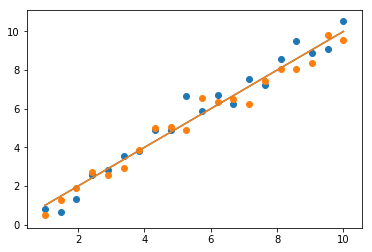

In [4]:
import matplotlib.pyplot as plt
N = 20
t = np.linspace(1, 10, N)
sigma = 0.5
T = t + np.random.randn(N)*sigma
plt.scatter(t, T)
plt.plot(t, t)
plt.show()

Pre fitovaciu funkciu $y(x) = a x + b$ definujeme celkovú odchýlku ako
$$ J(a, b) = \sum_{i=1}^N (y_i - y(x_i))^2$$

**[Problem]** Máme zoznam nameraných bodov $(x_i, y_i)$ a chceme ich fitnúť priamkou $y(x) = a x + b$.
Nájdite koeficienty $a, b$ tak, aby bola odchýlka $J(a,b)$ minimálna.